# EDA of Spotify's Top 200 Charts (2020 - 2021)

## Introduction

This notebook explores Spotify's Top 200 Charts and visualises it accordingly.

## Importing packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from wordcloud import WordCloud

## Opening file

In [3]:
df = pd.read_csv('spotify_dataset.csv',skipinitialspace=True)

## Understanding the dataset

In [4]:
df.shape

(1556, 23)

In [5]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [6]:
df.tail()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614.0,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",...,0.448,0.603,-7.176,0.0640,0.43300,0.0862,205.272,221307.0,0.422,G


In [7]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

## Cleaning dataset

### Dropping columns

In [9]:
df = df.drop(['Index','Song ID'],axis = 1)

### Missing values

In [10]:
missing_values_count = df.isnull().sum()
missing_values_count[0:]

Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Genre                        11
Release Date                 11
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                        11
dtype: int64

<AxesSubplot:>

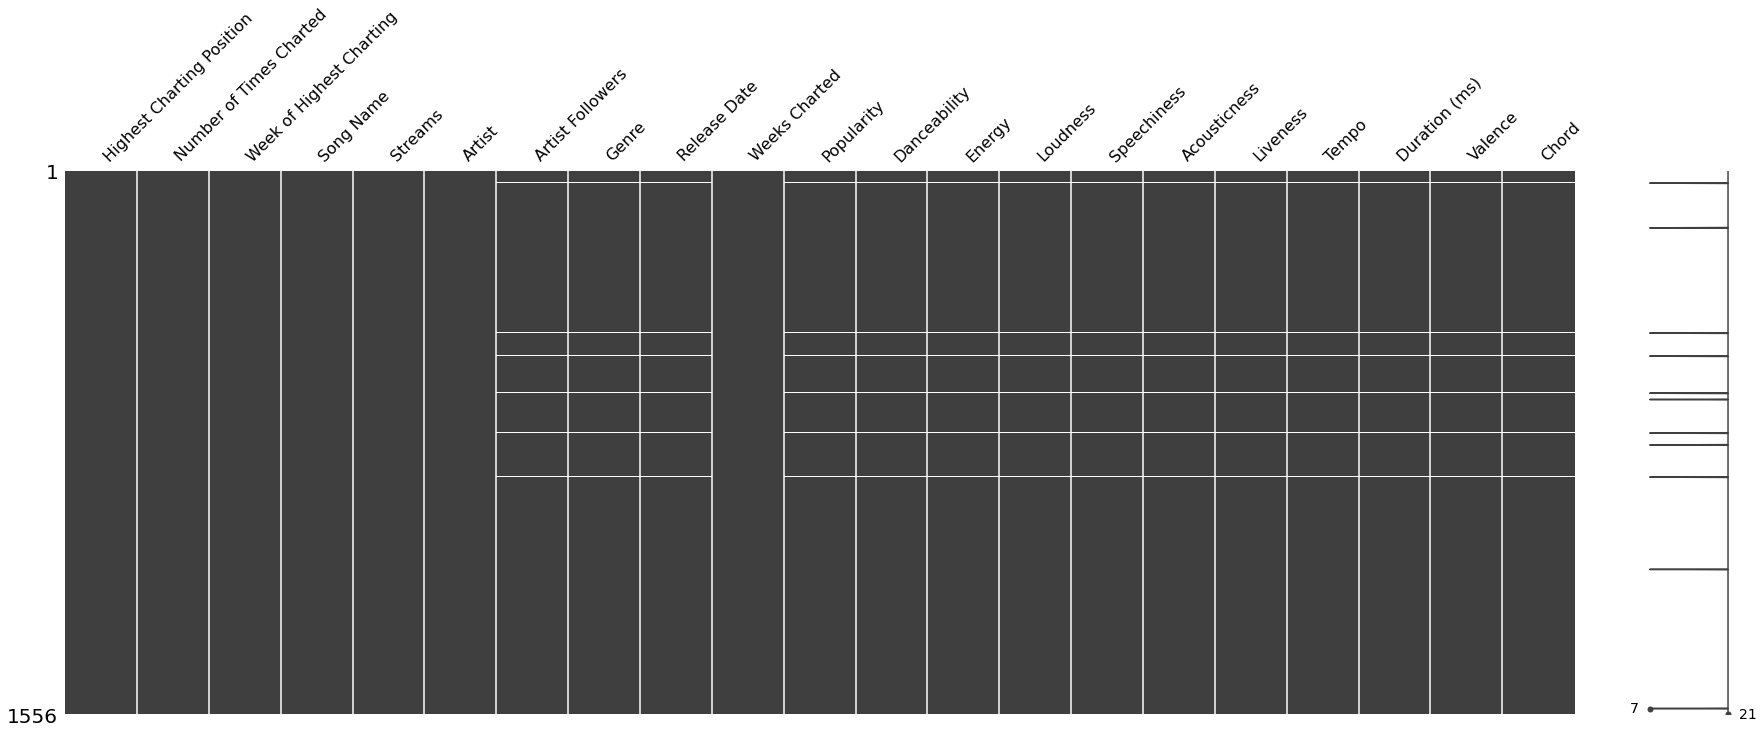

In [11]:
missingno.matrix(df, figsize = (30,10))

What is the total percentage of missing data?

In [12]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.4712939160239932

In [13]:
df = df.dropna()

### Replacing values

In [14]:
df.replace(',','', regex=True, inplace=True)

### Changing data type

In [15]:
convert_dict = {'Streams': float,
                'Artist Followers': float,
                'Popularity': float,
                'Danceability': float,
                'Energy':float,
                'Loudness':float,
                'Speechiness':float,
                'Acousticness':float,
                'Liveness':float,
                'Tempo':float,
                'Duration (ms)':float,
                'Valence':float
               }
df = df.astype(convert_dict)

## Data analysis

### A quick statistical overview 

In [16]:
df.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


### Is there a corrolation between varaibles?

<AxesSubplot:>

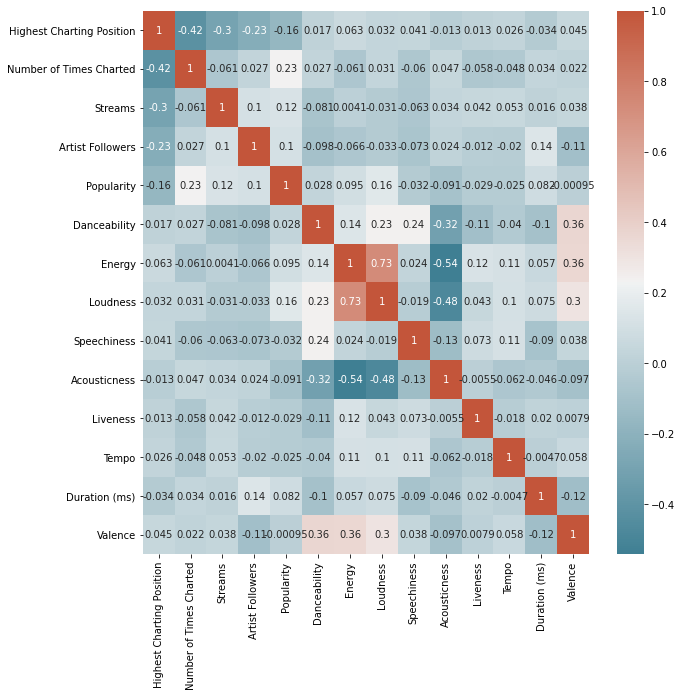

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Who are the top 10 most frequent charting songs on the chart?

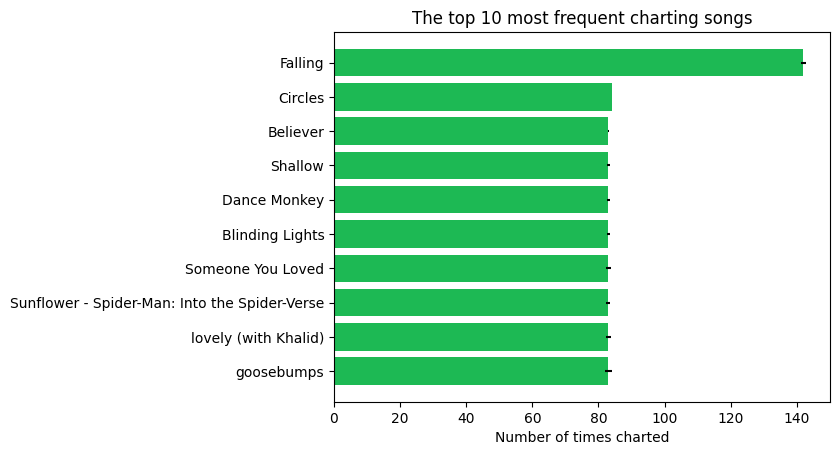

In [18]:
# This creates a sub-set of the top 
top_artist = df.sort_values(['Number of Times Charted'], ascending = False)
top_artist = top_artist[0:10]

# Data processing for plotting
plt.rcdefaults()
fig, ax = plt.subplots()

songs = top_artist['Song Name']
y_pos = np.arange(len(songs))
chart_num = top_artist['Number of Times Charted']
error = np.random.rand(len(songs))

# Plotting data
ax.barh(y_pos, chart_num, xerr=error, align='center', color = '#1DB954')
ax.set_yticks(y_pos)
ax.set_yticklabels(songs)

ax.invert_yaxis()
ax.set_xlabel('Number of times charted')
ax.set_title('The top 10 most frequent charting songs')

plt.show()


### Is there a relationship between the popularity and loudness of a song?

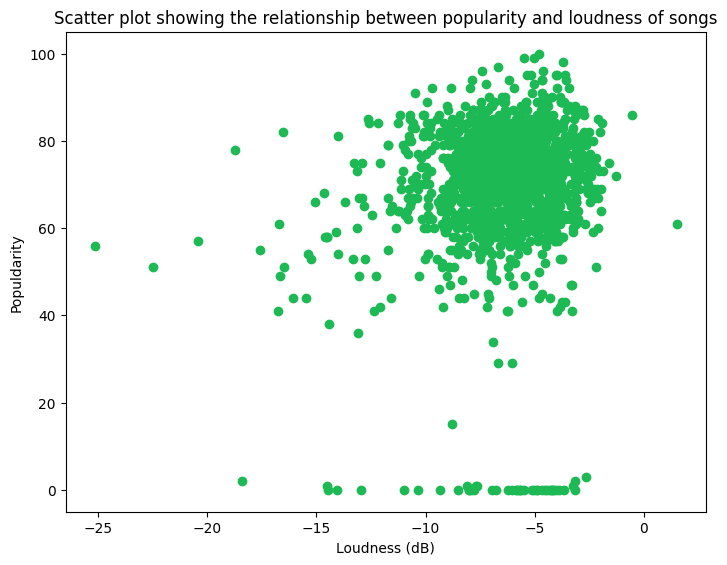

In [19]:
# Prepping data
x_data = df['Loudness']
y_data = df['Popularity']

# Data plotting
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x_data,y_data, color = '#1DB954')

# Description of table
ax.set_xlabel('Loudness (dB)')
ax.set_ylabel('Populdarity')
ax.set_title('Scatter plot showing the relationship between popularity and loudness of songs')
plt.show()

### Are the most frequently charted songs rated higher in valence than less frequent songs?

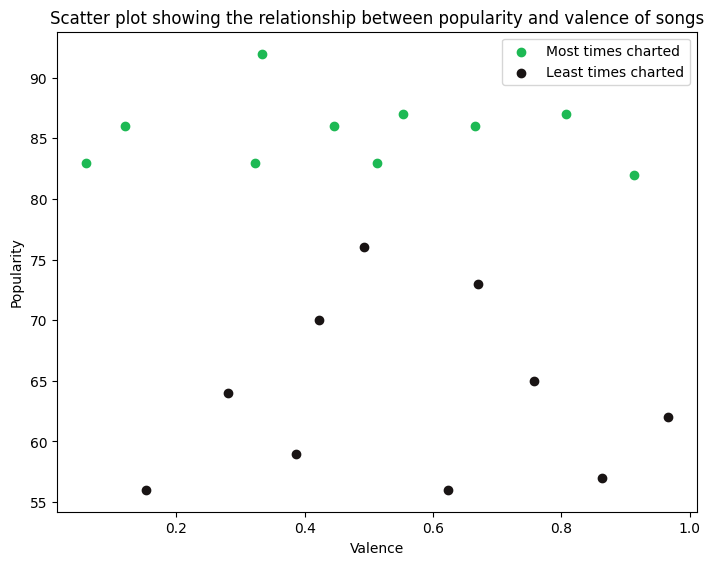

In [20]:
# Selecting subset
bot_artist = df.sort_values(['Number of Times Charted'], ascending = True)
bot_artist = bot_artist[0:10]

# Prepping data
x_popular_data = top_artist['Valence']
y_popular_data = top_artist['Popularity']

x_less_pop_data = bot_artist['Valence']
y_less_pop_data = bot_artist['Popularity']

# Data plotting
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x_popular_data,y_popular_data, color = '#1DB954', label = 'Most times charted')
ax.scatter(x_less_pop_data,y_less_pop_data, color = '#191414', label = 'Least times charted')
ax.set_xlabel('Valence')
ax.set_ylabel('Popularity')
ax.set_title('Scatter plot showing the relationship between popularity and valence of songs')
ax.legend()
plt.show()


### What percentage of songs only charted once?

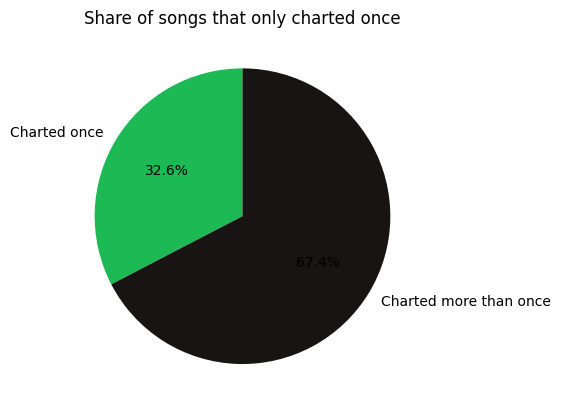

In [22]:
# Sellecting subset
once_charted = df[df['Number of Times Charted'] == 1].count()
twice_charted = df[df['Number of Times Charted'] > 1].count()

# Preparing data
labels = 'Charted once','Charted more than once'
counts = [once_charted['Number of Times Charted'],twice_charted['Number of Times Charted']]
colour_style = ['#1DB954','#191414']

# Plotting data
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors = colour_style)
plt.title('Share of songs that only charted once')



plt.show()

### What genre is represented the most?

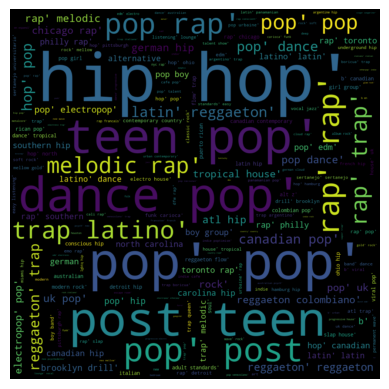

In [24]:
# Creating string varaible
genre = " "
for i in df['Genre']:
    genre = genre + i
    
# Creating visualistion
wordcloud = WordCloud(width = 1000, height = 1000, margin = 10).generate(genre)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()